# Numpy: Thinking In Arrays

At the core of most computational physics problems lives an array.

## Arrays
The basic type that NumPy provides is the N-dimensional array class ndarray. Rather
than being created directly, ndarrays are often instantiated via the array() function
that NumPy also provides. To create an array, import numpy and call array() on a
sequence:

In [101]:
# A common abbreviation for numpy is np
import numpy as np

### Creating Arrays

Here are some examples of how to create new arrays.
The most basic way is with the array() function.
Other methods include using the arange(), zeros(), ones(), and empty() functions:

In [102]:
np.array([6, 28, 496, 8128])

array([   6,   28,  496, 8128])

In [103]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [104]:
np.zeros(4)

array([ 0.,  0.,  0.,  0.])

In [105]:
np.ones((2, 3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [106]:
np.empty(4)

array([ 0.,  0.,  0.,  0.])

The linspace() and logspace() functions are also important to know. These create
an even linearly or logarithmically spaced grid of points between a lower and upper
bound that is inclusive on both ends. Note that logspace() may also take a base keyword
argument, which defaults to 10. The lower and upper bounds are then interpreted
as the base to these powers.

In [107]:
np.linspace(1, 2, 5)

array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ])

In [108]:
np.logspace(1, -1, 3)

array([ 10. ,   1. ,   0.1])

Make a scatter plot of the various arrays above:

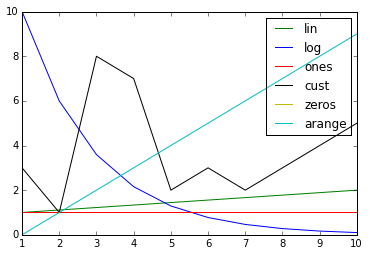

In [109]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 10, 10)
y_lin = np.linspace(1, 2, 10)
y_cust = np.array([3, 1, 8, 7, 2, 3, 2, 3, 4, 5])
y_log = np.logspace(1, -1, 10)
y_ones = np.ones(10)
y_range = np.arange(10)
y_zeros = np.zeros(10)


plt.plot(x, y_lin, color='g', label='lin')
plt.plot(x, y_log, color='b', label='log')
plt.plot(x, y_ones, color='r', label='ones')
plt.plot(x, y_cust, color='k', label='cust')
plt.plot(x, y_zeros, color='y', label='zeros')
plt.plot(x, y_range, color='c', label='arange')
plt.legend()



### Attributes of Arrays

A common method of reshaping an existing array is to assign a new tuple of integers
to the shape attribute. This will change the shape in-place. For example:

### Exercise: Explore Array Attributes

1. Create an array

In [110]:
a = np.array([1,2,3,42,4,5,24])

2. Using the dot and tab functionality in the ipython notebook, determine the meaning of arange, shape, and dtype.

In [111]:
a.shape

(7,)

In [112]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [113]:
a.shape = (2, 2)
a

array([[0, 1],
       [2, 3]])

The dtype or data type is the most important ndarray attribute.

In [114]:
a = np.array([6, 28, 496, 8128])
a.dtype

dtype('int64')

In [115]:
b = np.array([6, 28.0, 496, 8128])
b.dtype

dtype('float64')

When you are creating an array, the dtype that is automatically selected will always be
that of the least precise element. Say you have a list that is entirely integers with the
exception of a single float. An array created from this list will have the dtype
np.float64, because floats are less precise than integers. The order of data types sorted
from greatest to least precision is Boolean, unsigned integer, integer, float, complex,
string, and object. An example of this downcasting follows, where 28 is an
integer in the a array and a float in the b array:


In [116]:
a = np.array([6, 28.0, 496, 8128],
             dtype=np.int8)
a

array([  6,  28, -16, -64], dtype=int8)

In [117]:
b = np.array([6, 28.0, 496, 8128],
             dtype='f')
b

array([  6.00000000e+00,   2.80000000e+01,   4.96000000e+02,
         8.12800000e+03], dtype=float32)

In [118]:
np.array(['I will have length six', 'and so will I!'], dtype='S6')

array([b'I will', b'and so'], 
      dtype='|S6')

## Slicing and Views

What is different about slicing in NumPy is that because NumPy arrays are N-dimensional,
you may slice along any and all axes!

In [119]:
a = np.arange(8)

In [120]:
a[::-1]

array([7, 6, 5, 4, 3, 2, 1, 0])

In [121]:
a[2:6]

array([2, 3, 4, 5])

In [122]:
a[1::3]

array([1, 4, 7])

### Exercise:  Reshaping and Slicing

1) Create a 1D array that is 16 elements long and reshape it to be 4x4.

In [123]:
a = np.arange(16)
a.shape = (4, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

2) Slice the even rows and the odd columns.

In [124]:
a[::2, 1::2]

array([[ 1,  3],
       [ 9, 11]])

3) Slice the inner 2x2 array.

In [125]:
a[1:3, 1:3]

array([[ 5,  6],
       [ 9, 10]])

4) Reverse the first 3 rows, taking the first 3 columns.

In [126]:
a[2::-1, :3]     

array([[ 8,  9, 10],
       [ 4,  5,  6],
       [ 0,  1,  2]])

Since slices are views, this means that modifications to their elements are reflected
back in the original arrays. This makes sense, as there is only one block of memory
between them. As a demonstration,

**If you have two arrays a and b, where b is a slice of a,**


In [127]:
a = np.arange(6)
b = a[1::2]
b[1] = 42
a

array([ 0,  1,  2, 42,  4,  5])

**then you can tell that b is a view whose base is a**


In [128]:
b.base is a

True


Furthermore, changes to the contents of either a or b will also affect the other array. 
Can you show this by changing an element of b?

If you truly want a copy of a slice of an array, you can always create a new array from
the slice:

In [129]:
a = np.arange(16)
b = np.array(a[1::11])

## Arithmetic and Broadcasting

*broadcasting* : one element of a goes into all elements of b

In [130]:
a = np.arange(6, dtype=np.int64)
a

array([0, 1, 2, 3, 4, 5])

Slices are not the only way to create a view. The ndarray class has a view() method
on it that will give you a view into the whole array.

In [131]:
a.view('i4')

array([0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 5, 0], dtype=int32)

In [132]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [133]:
a - 1

array([-1,  0,  1,  2,  3,  4])

In [134]:
a + a

array([ 0,  2,  4,  6,  8, 10])

In [135]:
2*a**2 + 3*a + 1

array([ 1,  6, 15, 28, 45, 66])

In [136]:
a = np.arange(4)
a.shape = (2, 2)
a

array([[0, 1],
       [2, 3]])

In [137]:
b = np.array([[42], [43]])
b

array([[42],
       [43]])

In [138]:
a * b

array([[  0,  42],
       [ 86, 129]])

In [139]:
np.dot(a, b)

array([[ 43],
       [213]])

In [140]:
np.array([[ 43],
      [213]])

array([[ 43],
       [213]])

In [141]:
a = np.arange(12)
a.shape = (4, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [142]:
b = np.array([16, 17, 18])
b

array([16, 17, 18])

In [143]:
a + b

array([[16, 18, 20],
       [19, 21, 23],
       [22, 24, 26],
       [25, 27, 29]])

In [144]:
a.shape = (3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [145]:
a + b

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [146]:
b.shape = (3, 1)
b

array([[16],
       [17],
       [18]])

In [147]:
a + b

array([[16, 17, 18, 19],
       [21, 22, 23, 24],
       [26, 27, 28, 29]])

In [148]:
a = np.arange(6)
a.shape = (2, 3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [149]:
b = np.array([2, 3])
b

array([2, 3])

In [150]:
a - b

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [151]:
b[:, np.newaxis] - a

array([[ 2,  1,  0],
       [ 0, -1, -2]])

In [152]:
b[(slice(None),) + 31* (np.newaxis,)] - a

array([[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[ 2,  1,  0],
                                     [-1, -2, -3]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]],






























       [[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[ 3,  2,  1],
                                     [ 0, -1, -2]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]])

In [153]:
b[(slice(None),) + 30 * (np.newaxis,)] - a

array([[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[ 2,  1,  0],
                                    [-1, -2, -3]]]]]]]]]]]]]]]]]]]]]]]]]]]]]],





























       [[[[[[[[[[[[[[[[[[[[[[[[[[[[[[ 3,  2,  1],
                                    [ 0, -1, -2]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]])

## Fancy Indexing

In [154]:
a = 2*np.arange(8)**2 + 1
a

array([ 1,  3,  9, 19, 33, 51, 73, 99])

In [155]:
# pull out the fourth, last, and
# second indices
a[[3, -1, 1]]

array([19, 99,  3])

In [156]:
# pull out the Fibonacci sequence
fib = np.array([0, 1, 1, 2, 3, 5])
a[fib]

array([ 1,  3,  3,  9, 19, 51])

In [157]:
# pull out a 2x2 array
a[[[[2, 7], [4, 2]]]] 

array([[ 9, 99],
       [33,  9]])

In [158]:
a = np.arange(16) - 8
a.shape = (4, 4)
a

array([[-8, -7, -6, -5],
       [-4, -3, -2, -1],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7]])

In [159]:
# pull out the third, last, and
# first columns
a[:, [2, -1, 0]]

array([[-6, -5, -8],
       [-2, -1, -4],
       [ 2,  3,  0],
       [ 6,  7,  4]])

In [160]:
# pull out a Fibonacci sequence of
# rows for every other column, starting
# from the back
fib = np.array([0, 1, 1, 2, 3])
a[fib, ::-2]

array([[-5, -7],
       [-1, -3],
       [-1, -3],
       [ 3,  1],
       [ 7,  5]])

In [161]:
# get the diagonal with a range
i = np.arange(4)
a[i, i]

array([-8, -3,  2,  7])

In [162]:
# lower diagonal by subtracting one to 
# part of the range
a[i[1:], i[1:] - 1]

array([-4,  1,  6])

In [163]:
# upper diagonal by adding one to part 
# of the range
a[i[:3], i[:3] + 1]

array([-7, -2,  3])

In [164]:
# anti-diagonal by reversal
a[i, i[::-1]]

array([-5, -2,  1,  4])

## Masking

In [165]:
# create an array
a = np.arange(9)
a.shape = (3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [166]:
# create an all True mask
m = np.ones(3, dtype=bool)
m

array([ True,  True,  True], dtype=bool)

In [167]:
# take the diagonal
a[m, m]

array([0, 4, 8])

In [168]:
# create a mask
m = np.array([[1, 0, 1], 
              [False, True, False], 
              [0, 0, 1]], dtype=bool)

a[m]

array([0, 2, 4, 8])

In [169]:
a < 5

array([[ True,  True,  True],
       [ True,  True, False],
       [False, False, False]], dtype=bool)

In [170]:
m = (a >= 7)

In [171]:
a[m]

array([7, 8])

In [172]:
a[a < 5]

array([0, 1, 2, 3, 4])

In [173]:
np.array([0, 1, 2, 3, 4])

array([0, 1, 2, 3, 4])

In [174]:
a[(a < 5) | (a >= 7)]

array([0, 1, 2, 3, 4, 7, 8])

In [175]:
np.array([0, 1, 2, 3, 4, 7, 8])

array([0, 1, 2, 3, 4, 7, 8])

In [176]:
np.where(a < 5)

(array([0, 0, 0, 1, 1]), array([0, 1, 2, 0, 1]))

In [177]:
a[np.where(a >= 7)]

array([7, 8])

In [178]:
a[:, np.where(a < 2)[1]]

array([[0, 1],
       [3, 4],
       [6, 7]])

## Structured Arrays

In [179]:
# a simple flat dtype
fluid = np.dtype([
    ('x', int),
    ('y', np.int64),
    ('rho', 'f8'),
    ('vel', 'f8'),
    ])

# a dtype with a nested dtype
# and a subarray
particles = np.dtype([
    ('pos', [('x', int), 
             ('y', int), 
             ('z', int)]),
    ('mass', float), 
    ('vel', 'f4', 3)
    ])

In [180]:
particles.names

('pos', 'mass', 'vel')

In [181]:
fluid.fields

mappingproxy({'vel': (dtype('float64'), 24), 'y': (dtype('int64'), 8), 'x': (dtype('int64'), 0), 'rho': (dtype('float64'), 16)})

In [182]:
np.zeros(4, dtype=particles)

array([((0, 0, 0), 0.0, [0.0, 0.0, 0.0]),
       ((0, 0, 0), 0.0, [0.0, 0.0, 0.0]),
       ((0, 0, 0), 0.0, [0.0, 0.0, 0.0]), ((0, 0, 0), 0.0, [0.0, 0.0, 0.0])], 
      dtype=[('pos', [('x', '<i8'), ('y', '<i8'), ('z', '<i8')]), ('mass', '<f8'), ('vel', '<f4', (3,))])

In [183]:
# note that the rows are tuples
f = np.array([(42, 43, 6.0, 2.1), 
              (65, 66, 128.0, 3.7), 
              (127, 128, 3.0, 1.5)],
             dtype=fluid)
f

array([(42, 43, 6.0, 2.1), (65, 66, 128.0, 3.7), (127, 128, 3.0, 1.5)], 
      dtype=[('x', '<i8'), ('y', '<i8'), ('rho', '<f8'), ('vel', '<f8')])

In [184]:
f[1]

(65, 66, 128.0, 3.7)

In [185]:
f[::2]

array([(42, 43, 6.0, 2.1), (127, 128, 3.0, 1.5)], 
      dtype=[('x', '<i8'), ('y', '<i8'), ('rho', '<f8'), ('vel', '<f8')])

In [186]:
f['rho']

array([   6.,  128.,    3.])

In [187]:
f[['vel', 'x', 'rho']]

array([(2.1, 42, 6.0), (3.7, 65, 128.0), (1.5, 127, 3.0)], 
      dtype=[('vel', '<f8'), ('x', '<i8'), ('rho', '<f8')])

## Universal Functions

In [188]:
x = np.linspace(0.0, np.pi, 5)

In [189]:
np.sin(x)

array([  0.00000000e+00,   7.07106781e-01,   1.00000000e+00,
         7.07106781e-01,   1.22464680e-16])

In [190]:
a = np.arange(9)
a.shape = (3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

## Other Valuable Functions

In [191]:
np.sum(a)

36

In [192]:
np.sum(a, axis=0)

array([ 9, 12, 15])

In [193]:
np.sum(a, axis=1)

array([ 3, 12, 21])

## Numpy Wrap-up